# 3.2 感度分析

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import warnings
from mylib.plot import contourplot

sns.set_theme()
warnings.simplefilter("ignore")

In [2]:
Y = 57
N = 100

In [3]:
# theta0 と n0 の組み合わせを作る
n_points = 50
theta0 = np.linspace(0.1, 0.9, n_points)
n0 = 2 ** np.linspace(0, 5, n_points)

# データフレームにする
df_3_2 = pd.merge(
    pd.Series(theta0, name="theta0"),
    pd.Series(n0, name="n0"),
    how="cross",
)

# a,b を計算する
df_3_2 = df_3_2.assign(
    a=df_3_2["theta0"].mul(df_3_2["n0"]),
    b=df_3_2["theta0"].rsub(1).mul(df_3_2["n0"]),
)

with pd.option_context("display.max_columns", 20):
    display(df_3_2.round(1).T)

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
theta0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9
n0,1.0,1.1,1.2,1.2,1.3,1.4,1.5,1.6,1.8,1.9,...,16.9,18.2,19.5,20.9,22.5,24.1,25.9,27.8,29.8,32.0
a,0.1,0.1,0.1,0.1,0.1,0.1,0.2,0.2,0.2,0.2,...,15.2,16.4,17.6,18.8,20.2,21.7,23.3,25.0,26.8,28.8
b,0.9,1.0,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,...,1.7,1.8,2.0,2.1,2.2,2.4,2.6,2.8,3.0,3.2


In [4]:
def probability_3_2(a: float, b: float) -> float:
    # 事後分布のa, b
    a_post = a + Y
    b_post = b + N - Y

    # theta > 0.5 の確率
    thresh = 0.5
    proba = 1 - stats.beta.cdf(x=thresh, a=a_post, b=b_post)

    return proba

In [5]:
df_3_2["probability"] = df_3_2.apply(
    lambda row: probability_3_2(a=row["a"], b=row["b"]),
    axis=1,
)

with pd.option_context("display.max_columns", 20):
    display(df_3_2.T.round(2))

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
theta0,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,...,0.90,0.90,0.90,0.90,0.90,0.90,0.90,0.90,0.90,0.9
n0,1.00,1.07,1.15,1.24,1.33,1.42,1.53,1.64,1.76,1.89,...,16.93,18.17,19.50,20.93,22.47,24.11,25.88,27.78,29.81,32.0
a,0.10,0.11,0.12,0.12,0.13,0.14,0.15,0.16,0.18,0.19,...,15.24,16.36,17.55,18.84,20.22,21.70,23.29,25.00,26.83,28.8
b,0.90,0.97,1.04,1.11,1.19,1.28,1.38,1.48,1.58,1.70,...,1.69,1.82,1.95,2.09,2.25,2.41,2.59,2.78,2.98,3.2
probability,0.91,0.91,0.90,0.90,0.90,0.90,0.90,0.90,0.90,0.89,...,0.99,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0


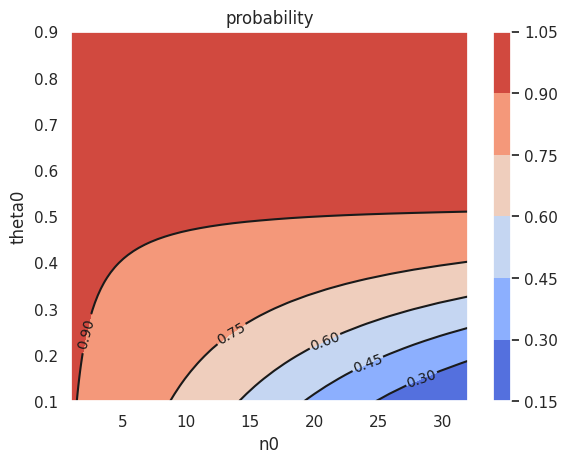

In [6]:
contourplot(
    df_3_2,
    "n0",
    "theta0",
    "probability",
)

等高線プロットから、以下のことがわかる。

- $\theta_0$ が大きい(だいたい0.3以上) または $n_0$ が小さい(だいたい15以下) の領域では $Pr(\theta > 0.5 | \sum Y_i = 57)$ は大きくなる。
- $\theta_0$ が小さい(だいたい0.3以下) かつ $n_0$ が大きい(だいたい15以上) の領域では $Pr(\theta > 0.5 | \sum Y_i = 57)$ は小さくなる。

以上から、次のような解釈をする。

- 事前の $\theta_0$ が0.3以上の場合は $\theta > 0.5$ を信用してよい。
- 事前の $\theta_0$ が0.3より小さい場合
    - 事前の信念の強さ $n_0$ が15以下のときは $\theta > 0.5$ を信用してよい。
    - 事前の信念の強さ $n_0$ が15より大きいときは $\theta > 0.5$ を信用できない。

In [7]:
y_A = [12, 9, 12, 14, 13, 13, 15, 8, 15, 6]
y_B = [11, 11, 10, 9, 9, 8, 7, 10, 6, 8, 8, 9, 7]

In [8]:
print("A系統のデータの要約統計量")
print(stats.describe(y_A))
print()
print("B系統のデータの要約統計量")
print(stats.describe(y_B))

A系統のデータの要約統計量
DescribeResult(nobs=10, minmax=(6, 15), mean=11.7, variance=9.344444444444445, skewness=-0.6848989298454216, kurtosis=-0.784392624713516)

B系統のデータの要約統計量
DescribeResult(nobs=13, minmax=(6, 11), mean=8.692307692307692, variance=2.3974358974358974, skewness=-0.024886573315266888, kurtosis=-0.9230890217049392)


## a

In [9]:
def summarise_poisson_gamma(a, b, y, print_results=False):
    # 結果を保存する辞書
    results_dict = {}

    # 事後分布のパラメータ
    a_posterior = a + np.sum(y)
    b_posterior = b + len(y)
    results_dict["a_posterior"] = a_posterior
    results_dict["b_posterior"] = b_posterior

    # 事後平均
    posterior_mean = a_posterior / b_posterior
    results_dict["posterior_mean"] = posterior_mean

    # 事後分散
    posterior_var = a_posterior / (b_posterior**2)
    results_dict["posterior_var"] = posterior_var

    # 信用区間
    credible_interval = stats.gamma.interval(
        confidence=0.95, a=a_posterior, scale=1 / b_posterior
    )
    results_dict["credible_interval"] = credible_interval

    if print_results:
        print(
            "Posterior Distributiion:\n",
            f"\tgamma({a_posterior}, {b_posterior})",
            end="\n",
        )
        print("Posterior Mean:\n", f"\t {posterior_mean}", end="\n")
        print("Posterior Variance:\n", f"\t {posterior_var}", end="\n")
        print("95% Credible Interval:\n", f"\t {credible_interval}", end="\n")

    return results_dict

In [10]:
results_A = summarise_poisson_gamma(
    a=120,
    b=10,
    y=y_A,
    print_results=True,
)

Posterior Distributiion:
 	gamma(237, 20)
Posterior Mean:
 	 11.85
Posterior Variance:
 	 0.5925
95% Credible Interval:
 	 (10.389238190941795, 13.405448325642006)


In [11]:
results_B = summarise_poisson_gamma(
    a=12,
    b=1,
    y=y_B,
    print_results=True,
)

Posterior Distributiion:
 	gamma(125, 14)
Posterior Mean:
 	 8.928571428571429
Posterior Variance:
 	 0.6377551020408163
95% Credible Interval:
 	 (7.432064219464302, 10.560308149242363)


## b

In [12]:
df_3_3 = pd.DataFrame()

df_3_3["n0"] = np.arange(1, 50 + 1)
df_3_3["a"] = df_3_3["n0"].mul(12)
df_3_3["b"] = df_3_3["n0"]

df_3_3["posterior_mean"] = df_3_3.apply(
    lambda row: summarise_poisson_gamma(a=row["a"], b=row["b"], y=y_B)[
        "posterior_mean"
    ],
    axis=1,
)

df_3_3.head()

,n0,a,b,posterior_mean
0,1,12,1,8.928571
1,2,24,2,9.133333
2,3,36,3,9.312500
3,4,48,4,9.470588
4,5,60,5,9.611111


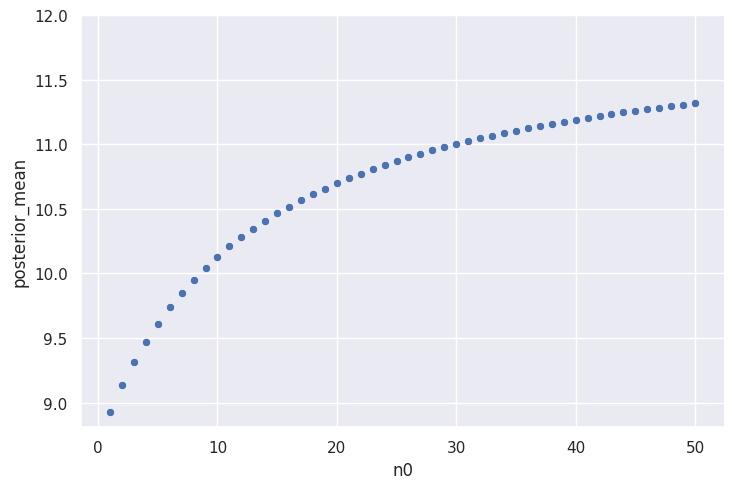

In [13]:
_ = sns.relplot(
    df_3_3,
    x="n0",
    y="posterior_mean",
    aspect=1.5,
).set(ylim=(None, 12.0))